In [1]:
#%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import ZebraLib as zb
from scipy.optimize import curve_fit

def q0(t, tal, k, qis):
    return k*qis*(1-np.e**(-(t/tal)))

df_d = pd.read_excel('D:/UNESP/EngMec-UNESP/Instrumentaçãa Mecânica/Relatório_3/dados_Lab_3.xlsx', sheet_name='Degrau')
df_s = pd.read_excel('D:/UNESP/EngMec-UNESP/Instrumentaçãa Mecânica/Relatório_3/dados_Lab_3.xlsx', sheet_name='Senoidal')

df_s = df_s.drop(9)

## Método 1 - degrau

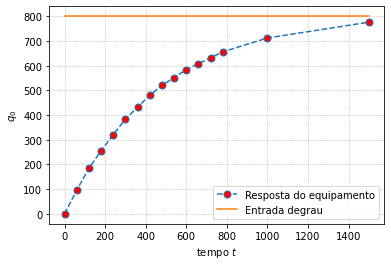

In [9]:
fig, ax = plt.subplots()
ax.set(xlabel = r'tempo $t$', ylabel = r'$q_0$')
#Dados - degrau
ax.plot(df_d.t, df_d.q0, label = "Resposta do equipamento", 
            marker='o', markerfacecolor='red', markersize=7, ls='--')

ax.plot(df_d.t, df_d.qis, label = "Entrada degrau")

#ax.plot(df_d.t, q0(df_d.t, 60, 0.6, 800), label = "Entrada degrau")

ax.grid(ls='dotted')
ax.legend()

fig.savefig('figura1.pdf', bbox_inches='tight')

## Método 2 - degrau

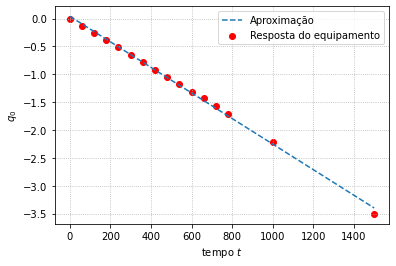

In [3]:
def func_ln(q_0, q_i):
    return np.log((1 - (q_0/q_i)))

dados_q0 = func_ln(df_d.q0, df_d.qis)
x_new = np.linspace(df_d.t.min(), df_d.t.max())
poly = zb.fit(df_d.t, dados_q0, 1)

fig, ax = plt.subplots()
ax.set(xlabel = r'tempo $t$', ylabel = r'$q_0$')

#Dados - degrau
ax.scatter(df_d.t, dados_q0, c='red', label="Resposta do equipamento")
ax.plot(x_new, poly(x_new), ls='--', label="Aproximação")

ax.grid(ls='dotted')
ax.legend()

fig.savefig('figura2.pdf', bbox_inches='tight')

## Método 3 - senoidal

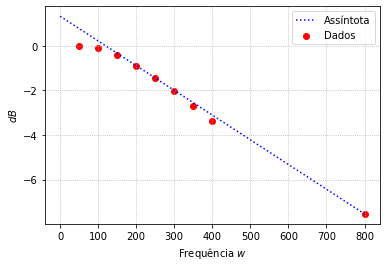

In [4]:
#%matplotlib qt
def dB(q_0, q_i):
    #return 20*np.log10(1/(((tau*w)**2 + 1)**0.5))
    return 20*np.log10(q_0/q_i)

x = np.linspace(0, 800)
poly = zb.fit(df_s.w.iloc[[4,8]], dB(df_s.q0[[4,8]], df_s.qi[[4,8]]), 1)

fig, ax = plt.subplots()
ax.set(xlabel = r'Frequência $w$', ylabel = r'$dB$')

ax.plot((x), poly(x), ls=':', c='blue', label="Assíntota")
ax.scatter((df_s.w), dB(df_s.q0, df_s.qi) , c='red', label="Dados")

ax.grid(ls='dotted')
ax.legend()
#ax.set_xscale('log')

fig.savefig('figura4.pdf', bbox_inches='tight')

In [5]:
poly

poly1d([-0.01107139,  1.32209625])

In [6]:
1/120

0.008333333333333333